### Problem Statement
#### A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

#### The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

In [206]:
#Import libraries
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics
from sklearn.feature_selection import RFE
import statsmodels.api as sm

In [207]:
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [208]:
# drop duplicates

data[data.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

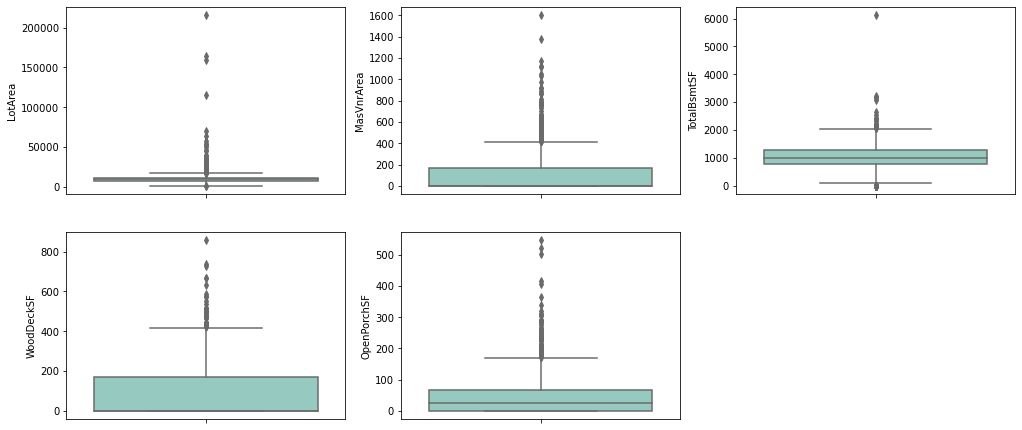

In [210]:
# Outlier analysis and handling
plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = data)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = data)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = data)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = data)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = data)
plt.show()

In [211]:
# Removing Outliers

# Removing values beyond q1 and q3

def removeOutliers(data , col):
    Q1 = data[col].quantile(0.1)
    Q3 = data[col].quantile(0.9)
    IQR = Q3 - Q1
    data = data[(data[col] >= Q1 - 1.5*IQR) & 
                      (data[col] <= Q3 + 1.5*IQR)]
    return data

for col in ('LotArea','MasVnrArea','TotalBsmtSF','WoodDeckSF','OpenPorchSF'):
    data = removeOutliers(data,col)
    
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1403.000000,1403.000000,1157.000000,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000,...,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000
mean,731.265859,56.870991,69.448574,9590.350677,6.057733,5.585887,1970.938703,1984.686386,93.044904,425.990734,...,89.218104,44.022808,22.352103,3.548111,14.223806,2.528867,43.295795,6.327869,2007.817534,176905.269423
std,422.760055,42.138059,22.980249,3802.124302,1.346609,1.116726,30.222932,20.710731,151.291026,422.807395,...,116.408815,59.467629,61.548759,29.899135,53.366200,38.949120,504.632079,2.702192,1.329273,73662.271622
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,365.500000,20.000000,59.000000,7500.000000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129000.000000
50%,731.000000,50.000000,69.000000,9353.000000,6.000000,5.000000,1972.000000,1993.000000,0.000000,371.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,1097.500000,70.000000,80.000000,11364.500000,7.000000,6.000000,2000.000000,2004.000000,158.000000,696.500000,...,167.000000,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,209200.000000
max,1459.000000,190.000000,313.000000,27650.000000,10.000000,9.000000,2010.000000,2010.000000,788.000000,2188.000000,...,586.000000,319.000000,552.000000,508.000000,440.000000,738.000000,15500.000000,12.000000,2010.000000,745000.000000


<Figure size 720x360 with 0 Axes>

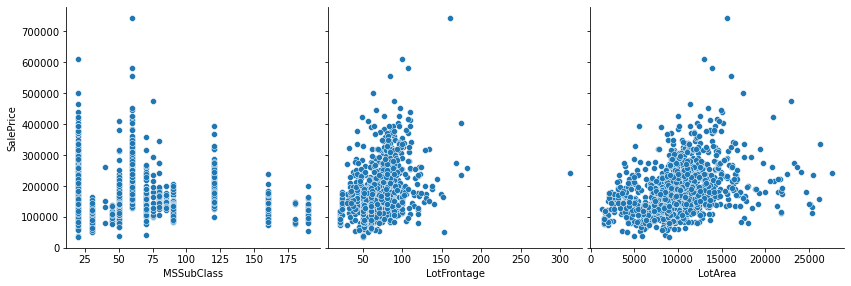

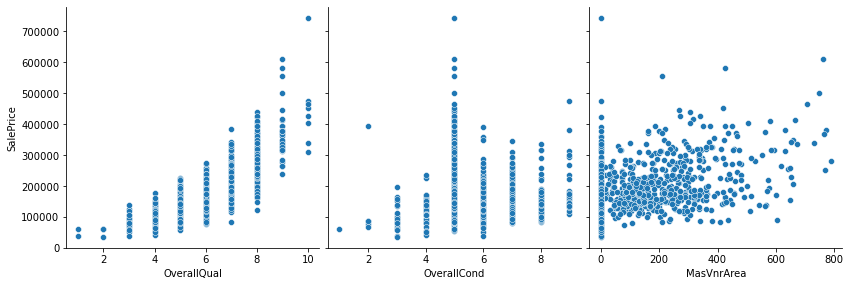

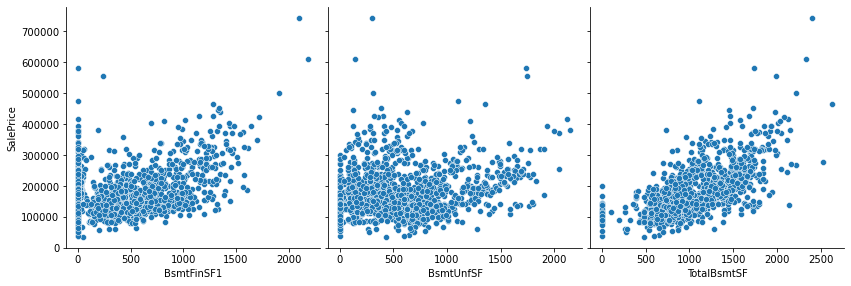

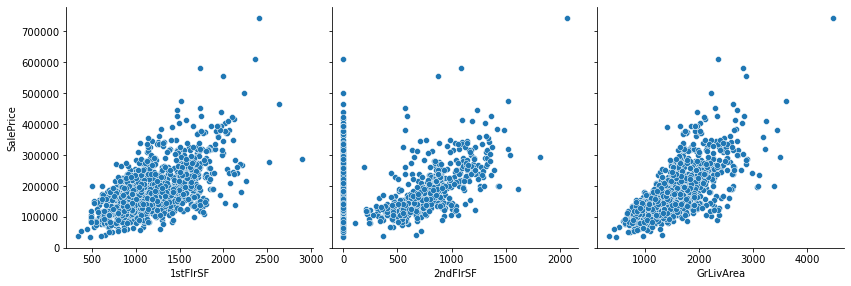

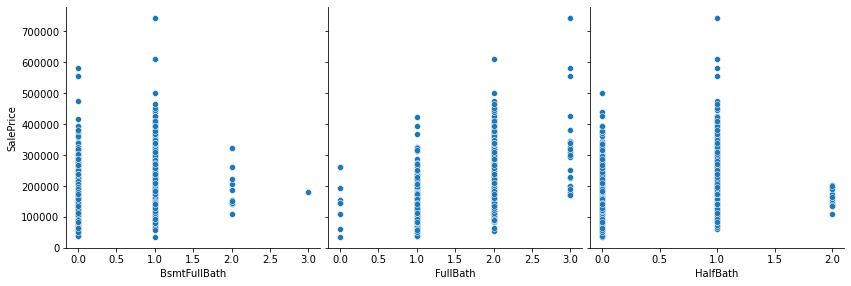

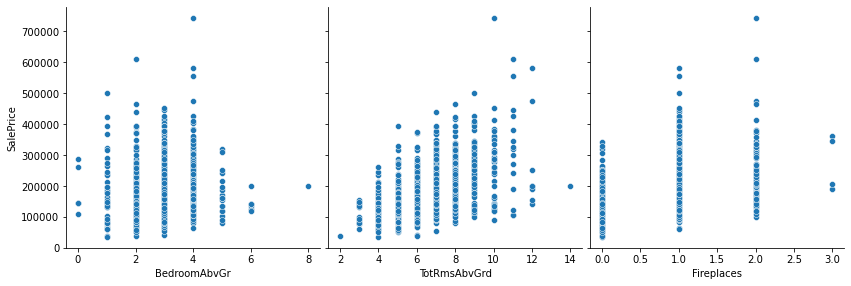

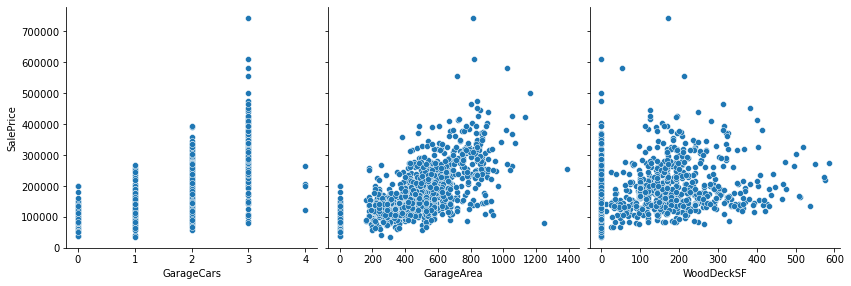

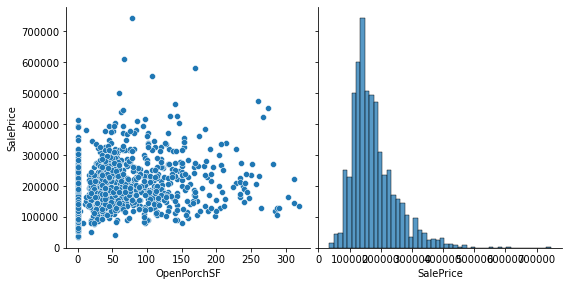

In [212]:
# Check the numerical values using pairplots

plt.figure(figsize=(10,5))
sns.pairplot(data, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(data, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(data, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(data, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(data, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(data, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(data, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(data, x_vars=['OpenPorchSF','SalePrice'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

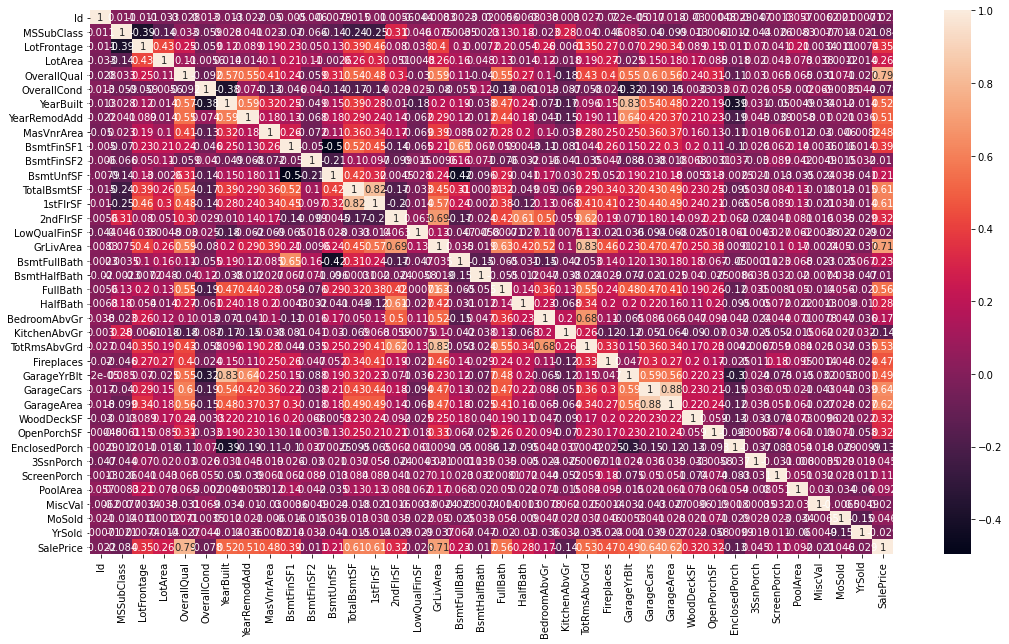

In [213]:
# Check co-relation 
# plotting correlations on a heatmap
plt.figure(figsize=(18,10))
sns.heatmap(numeric_data.corr(), annot=True)
plt.show()

High correlated variales and need to remove on of the variable to remove correlation
GarageCars and GarageArea (0.88)
GarageYrBlt and YearBuilt (0.83)
TotRmsAbvGrd and GrLivArea (0.83)
TotalBsmtSF and 1stflrSF (0.82)

In [214]:
data = data.drop(['GarageCars', 'GarageYrBlt','TotRmsAbvGrd','TotalBsmtSF'],axis=1)

In [215]:
# Check number of null values
null_col_per = round(100*(data.isnull().sum()/len(data.index)), 2)
print(dict(null_col_per))

{'Id': 0.0, 'MSSubClass': 0.0, 'MSZoning': 0.0, 'LotFrontage': 17.53, 'LotArea': 0.0, 'Street': 0.0, 'Alley': 93.87, 'LotShape': 0.0, 'LandContour': 0.0, 'Utilities': 0.0, 'LotConfig': 0.0, 'LandSlope': 0.0, 'Neighborhood': 0.0, 'Condition1': 0.0, 'Condition2': 0.0, 'BldgType': 0.0, 'HouseStyle': 0.0, 'OverallQual': 0.0, 'OverallCond': 0.0, 'YearBuilt': 0.0, 'YearRemodAdd': 0.0, 'RoofStyle': 0.0, 'RoofMatl': 0.0, 'Exterior1st': 0.0, 'Exterior2nd': 0.0, 'MasVnrType': 0.0, 'MasVnrArea': 0.0, 'ExterQual': 0.0, 'ExterCond': 0.0, 'Foundation': 0.0, 'BsmtQual': 2.64, 'BsmtCond': 2.64, 'BsmtExposure': 2.71, 'BsmtFinType1': 2.64, 'BsmtFinSF1': 0.0, 'BsmtFinType2': 2.64, 'BsmtFinSF2': 0.0, 'BsmtUnfSF': 0.0, 'Heating': 0.0, 'HeatingQC': 0.0, 'CentralAir': 0.0, 'Electrical': 0.07, '1stFlrSF': 0.0, '2ndFlrSF': 0.0, 'LowQualFinSF': 0.0, 'GrLivArea': 0.0, 'BsmtFullBath': 0.0, 'BsmtHalfBath': 0.0, 'FullBath': 0.0, 'HalfBath': 0.0, 'BedroomAbvGr': 0.0, 'KitchenAbvGr': 0.0, 'KitchenQual': 0.0, 'Functio

In [216]:
# Fill Null values and Na values

columns_tofill = {"Alley" : "No Alley", "BsmtQual": "No Basement","BsmtCond":"No Basement",
                  "BsmtExposure":"No Basement","BsmtFinType1":"No Basement","BsmtFinType2":"No Basement",
                 "FireplaceQu":"No firePlace","GarageType":"No Garage","GarageFinish":"no Garage",
                  "GarageQual":"No Garage","GarageCond":"No Garage","PoolQC":"No Pool","Electrical":"Other",
                  "Fence":"No Fence","MiscFeature":" No MiscFeature",'MasVnrType':'None'}

for col in columns_tofill.items():
    data[col[0]]=data[col[0]].fillna(col[1])
    
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,No MiscFeature,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,No MiscFeature,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,...,0,No Pool,No Fence,No MiscFeature,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,...,0,No Pool,No Fence,No MiscFeature,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,...,0,No Pool,No Fence,No MiscFeature,0,12,2008,WD,Normal,250000


In [217]:
# Impute the null values 
data['LotFrontage'] = data['LotFrontage'].replace(np.nan, data['LotFrontage'].median())
data['MasVnrArea'] = data['MasVnrArea'].replace(np.nan, data['MasVnrArea'].median())

In [218]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,No MiscFeature,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,No MiscFeature,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,...,0,No Pool,No Fence,No MiscFeature,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,...,0,No Pool,No Fence,No MiscFeature,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,...,0,No Pool,No Fence,No MiscFeature,0,12,2008,WD,Normal,250000


In [219]:
dict(data.isnull().sum())

{'Id': 0,
 'MSSubClass': 0,
 'MSZoning': 0,
 'LotFrontage': 0,
 'LotArea': 0,
 'Street': 0,
 'Alley': 0,
 'LotShape': 0,
 'LandContour': 0,
 'Utilities': 0,
 'LotConfig': 0,
 'LandSlope': 0,
 'Neighborhood': 0,
 'Condition1': 0,
 'Condition2': 0,
 'BldgType': 0,
 'HouseStyle': 0,
 'OverallQual': 0,
 'OverallCond': 0,
 'YearBuilt': 0,
 'YearRemodAdd': 0,
 'RoofStyle': 0,
 'RoofMatl': 0,
 'Exterior1st': 0,
 'Exterior2nd': 0,
 'MasVnrType': 0,
 'MasVnrArea': 0,
 'ExterQual': 0,
 'ExterCond': 0,
 'Foundation': 0,
 'BsmtQual': 0,
 'BsmtCond': 0,
 'BsmtExposure': 0,
 'BsmtFinType1': 0,
 'BsmtFinSF1': 0,
 'BsmtFinType2': 0,
 'BsmtFinSF2': 0,
 'BsmtUnfSF': 0,
 'Heating': 0,
 'HeatingQC': 0,
 'CentralAir': 0,
 'Electrical': 0,
 '1stFlrSF': 0,
 '2ndFlrSF': 0,
 'LowQualFinSF': 0,
 'GrLivArea': 0,
 'BsmtFullBath': 0,
 'BsmtHalfBath': 0,
 'FullBath': 0,
 'HalfBath': 0,
 'BedroomAbvGr': 0,
 'KitchenAbvGr': 0,
 'KitchenQual': 0,
 'Functional': 0,
 'Fireplaces': 0,
 'FireplaceQu': 0,
 'GarageType': 0,

In [220]:
# Create a new column named BuiltOrRemodelledAge and determine the age of the building at the time of selling

def getBuiltOrRemodelAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
data['BuiltOrRemodelAge'] = data.apply(getBuiltOrRemodelAge, axis=1)
#Dropping coulmns
data.drop(['YearBuilt', 'YearRemodAdd', 'YrSold'], axis = 1, inplace = True)
data.head()  

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,BuiltOrRemodelAge
0,1,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,No MiscFeature,0,2,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,No MiscFeature,0,5,WD,Normal,181500,31
2,3,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,...,0,No Pool,No Fence,No MiscFeature,0,9,WD,Normal,223500,6
3,4,70,RL,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,...,0,No Pool,No Fence,No MiscFeature,0,2,WD,Abnorml,140000,36
4,5,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,...,0,No Pool,No Fence,No MiscFeature,0,12,WD,Normal,250000,8


In [221]:
# Drop the following columns that have more than 85% values associated to a specific value
# We will also drop MoSold as we will not be using that for further analysis

def getHighNumericalValueCounts():
    column = []
    numerical_columns = data.select_dtypes(include=['int64', 'float64','object'])
    for col in (numerical_columns):
        if(data[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighNumericalValueCounts()
data.drop(columnsToBeRemoved, axis = 1, inplace = True)

data.drop(['MoSold'], axis = 1, inplace = True)

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,...,GarageFinish,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,SaleType,SaleCondition,SalePrice,BuiltOrRemodelAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,Norm,1Fam,...,RFn,548,0,61,0,No Fence,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,Feedr,1Fam,...,RFn,460,298,0,0,No Fence,WD,Normal,181500,31
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,Norm,1Fam,...,RFn,608,0,42,0,No Fence,WD,Normal,223500,6
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,Norm,1Fam,...,Unf,642,0,35,272,No Fence,WD,Abnorml,140000,36
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,Norm,1Fam,...,RFn,836,192,84,0,No Fence,WD,Normal,250000,8


In [222]:
null_col_per = round(100*(data.isnull().sum()/len(data.index)), 2)
print(dict(null_col_per))

{'Id': 0.0, 'MSSubClass': 0.0, 'MSZoning': 0.0, 'LotFrontage': 0.0, 'LotArea': 0.0, 'LotShape': 0.0, 'LotConfig': 0.0, 'Neighborhood': 0.0, 'Condition1': 0.0, 'BldgType': 0.0, 'HouseStyle': 0.0, 'OverallQual': 0.0, 'OverallCond': 0.0, 'RoofStyle': 0.0, 'Exterior1st': 0.0, 'Exterior2nd': 0.0, 'MasVnrType': 0.0, 'MasVnrArea': 0.0, 'ExterQual': 0.0, 'ExterCond': 0.0, 'Foundation': 0.0, 'BsmtQual': 0.0, 'BsmtExposure': 0.0, 'BsmtFinType1': 0.0, 'BsmtFinSF1': 0.0, 'BsmtFinType2': 0.0, 'BsmtUnfSF': 0.0, 'HeatingQC': 0.0, '1stFlrSF': 0.0, '2ndFlrSF': 0.0, 'GrLivArea': 0.0, 'BsmtFullBath': 0.0, 'FullBath': 0.0, 'HalfBath': 0.0, 'BedroomAbvGr': 0.0, 'KitchenQual': 0.0, 'Fireplaces': 0.0, 'FireplaceQu': 0.0, 'GarageType': 0.0, 'GarageFinish': 0.0, 'GarageArea': 0.0, 'WoodDeckSF': 0.0, 'OpenPorchSF': 0.0, 'EnclosedPorch': 0.0, 'Fence': 0.0, 'SaleType': 0.0, 'SaleCondition': 0.0, 'SalePrice': 0.0, 'BuiltOrRemodelAge': 0.0}


In [223]:
data.select_dtypes(include='object').isnull().sum()[data.select_dtypes(include='object').isnull().sum()>0]

Series([], dtype: int64)

In [224]:
# Dummy value

data['LotShape'] = data['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
data['ExterQual'] = data['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
data['BsmtQual'] = data['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'No Basement': 0})
data['BsmtExposure'] = data['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'No Basement': 0})
data['BsmtFinType1'] = data['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'No Basement': 0})
data['HeatingQC'] = data['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
data['KitchenQual'] = data['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
data['FireplaceQu'] = data['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'No firePlace': 0})
data['GarageFinish'] = data['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'no Garage': 0 })
data['BldgType'] = data['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
data['HouseStyle'] = data['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
data['Fence'] = data['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'No Fence': 0 })
data['LotConfig'] = data['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
data['MasVnrType'] = data['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
data['SaleCondition'] = data['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,...,GarageFinish,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,SaleType,SaleCondition,SalePrice,BuiltOrRemodelAge
0,1,60,RL,65.0,8450,3,5,CollgCr,Norm,1,...,2,548,0,61,0,0,WD,1,208500,5
1,2,20,RL,80.0,9600,3,2,Veenker,Feedr,1,...,2,460,298,0,0,0,WD,1,181500,31
2,3,60,RL,68.0,11250,2,5,CollgCr,Norm,1,...,2,608,0,42,0,0,WD,1,223500,6
3,4,70,RL,60.0,9550,2,4,Crawfor,Norm,1,...,1,642,0,35,272,0,WD,0,140000,36
4,5,60,RL,84.0,14260,2,2,NoRidge,Norm,1,...,2,836,192,84,0,0,WD,1,250000,8


In [225]:
dummy_col = pd.get_dummies(data[['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType']],
                           drop_first=True)

data = pd.concat([data,dummy_col],axis='columns')

data = data.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation','GarageType','Id'], axis='columns')
data.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage
0,60,65.0,8450,3,5,Norm,1,4,7,5,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,3,2,Feedr,1,1,6,8,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,2,5,Norm,1,4,7,5,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,2,4,Norm,1,4,7,5,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,2,2,Norm,1,4,8,5,...,1,0,0,0,1,0,0,0,0,0


In [226]:
#data.drop(['Street','Alley','LandContour','Utilities'],axis=1, inplace=True)
data = data.select_dtypes(include=['uint8','int64','float64'])
data.info

<bound method DataFrame.info of       MSSubClass  LotFrontage  LotArea  LotShape  LotConfig  BldgType  \
0             60         65.0     8450         3          5         1   
1             20         80.0     9600         3          2         1   
2             60         68.0    11250         2          5         1   
3             70         60.0     9550         2          4         1   
4             60         84.0    14260         2          2         1   
...          ...          ...      ...       ...        ...       ...   
1454          20         62.0     7500         3          5         1   
1455          60         62.0     7917         3          5         1   
1456          20         85.0    13175         3          5         1   
1457          70         66.0     9042         3          5         1   
1458          20         68.0     9717         3          5         1   

      HouseStyle  OverallQual  OverallCond  MasVnrType  ...  Foundation_PConc  \
0         

### Build Model

In [227]:
X = data.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,BldgType,HouseStyle,OverallQual,OverallCond,MasVnrType,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage
0,60,65.0,8450,3,5,1,4,7,5,1,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,3,2,1,1,6,8,0,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,2,5,1,4,7,5,1,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,2,4,1,4,7,5,0,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,2,2,1,4,8,5,1,...,1,0,0,0,1,0,0,0,0,0


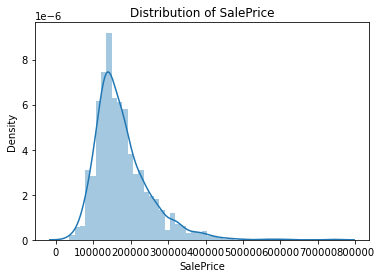

In [228]:
# Checking the distribution of target variable, SalePrice

plt.title('Distribution of SalePrice')
sns.distplot(data['SalePrice'])
plt.show()


In [229]:
# log transformed SalePrice is normally distributed, hence transformed data will be used for model building

y = np.log(data['SalePrice'])
print(y)

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1454    12.128111
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
Name: SalePrice, Length: 1403, dtype: float64


In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [231]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(982, 109)
(421, 109)
(982,)
(421,)


In [232]:
num_values=X_train.select_dtypes(include=['int64','float64']).columns
num_values

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LotConfig',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtUnfSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenQual', 'Fireplaces', 'FireplaceQu', 'GarageFinish',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'Fence',
       'SaleCondition', 'BuiltOrRemodelAge'],
      dtype='object')

In [233]:
# scaling the features

#   Scaling the data
scaler = StandardScaler()
X_train[num_values] = scaler.fit_transform(X_train[num_values])
X_test[num_values] = scaler.transform(X_test[num_values])
X_train.head

<bound method NDFrame.head of       MSSubClass  LotFrontage   LotArea  LotShape  LotConfig  BldgType  \
660     0.087896    -0.016328  0.722174  0.710506  -1.996559 -0.418648   
804    -0.872483     0.264975 -0.167708  0.710506   0.551356 -0.418648   
1017    1.528465    -0.016328 -1.005523 -1.020802  -1.996559  2.384393   
949    -0.872483     0.405627 -0.073040  0.710506   0.551356 -0.418648   
243     2.488845     0.264975  0.295641  0.710506  -0.722601  2.384393   
...          ...          ...       ...       ...        ...       ...   
1140   -0.872483    -0.438284 -0.601605  0.710506  -0.722601 -0.418648   
1176   -0.872483    -1.516614 -0.706529 -1.020802  -1.996559 -0.418648   
1349    0.327991    -0.907123 -1.153836  0.710506   0.551356 -0.418648   
899    -0.872483    -0.203864 -0.695484  0.710506   0.551356 -0.418648   
1172    2.488845    -1.610382 -1.478075 -1.020802   0.551356  2.384393   

      HouseStyle  OverallQual  OverallCond  MasVnrType  ...  Foundation_PConc  \


In [234]:
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,50)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=50)

In [235]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [236]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

In [237]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

In [238]:
# list pf alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [239]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
16,5.0,-0.087331,-0.092287,1
17,6.0,-0.087564,-0.092294,2
15,4.0,-0.087069,-0.092297,3
14,3.0,-0.086769,-0.092307,4
18,7.0,-0.087770,-0.092314,5
19,8.0,-0.087952,-0.092338,6
20,9.0,-0.088123,-0.092379,7
13,2.0,-0.086415,-0.092382,8
21,10.0,-0.088286,-0.092417,9
12,1.0,-0.085967,-0.092693,10


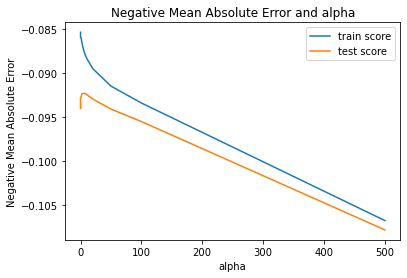

In [240]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [241]:
# get the best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=5.0)

In [242]:
# check the coefficient values with lambda = 5

alpha = 5.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.03789141,  0.11392647,  0.03692361,  0.03529617,  0.05126349,
        0.12256741,  0.04514645, -0.03823176,  0.08861514,  0.0522572 ,
        0.08976188,  0.03779712, -0.06232813,  0.09452241, -0.03286129,
       -0.10518133, -0.09917955, -0.04497516, -0.01204929, -0.02703244,
        0.07826141, -0.09255866, -0.03876837, -0.03639843, -0.02085011,
        0.09090294,  0.04807507, -0.07950721,  0.08300387, -0.0086644 ,
       -0.00399559, -0.00843255,  0.02580664, -0.02906322, -0.052755  ,
        0.03026588, -0.0086644 ,  0.0416611 ,  0.01797506, -0.01511815,
       -0.01026089,  0.03244654, -0.03721296,  0.05018033,  0.11205292,
        0.05996858,  0.0391681 , -0.05149864, -0.06077067, -0.04739443])

In [243]:
#Check the mean squared error

mean_squared_error(y_test, ridge.predict(X_test))

0.014826900405418732

In [244]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,LotArea,0.0379
1,OverallQual,0.1139
2,OverallCond,0.0369
3,BsmtQual,0.0353
4,BsmtFinSF1,0.0513
5,GrLivArea,0.1226
6,GarageArea,0.0451
7,BuiltOrRemodelAge,-0.0382
8,MSZoning_FV,0.0886
9,MSZoning_RH,0.0523


In [245]:
# double alpha
# check the coefficient values with lambda = 5

alpha = 10.0
ridge_double = Ridge(alpha=alpha)
ridge_double.fit(X_train, y_train)
ridge_double.coef_

array([ 0.0376357 ,  0.11743232,  0.03654234,  0.03550465,  0.05172537,
        0.12102132,  0.04598002, -0.03914969,  0.06151048,  0.02454906,
        0.06859864,  0.00591974, -0.03889311,  0.08411221, -0.02701732,
       -0.08648967, -0.06312043, -0.03638742, -0.0043774 , -0.02042872,
        0.06804944, -0.079032  , -0.03155395, -0.02784923, -0.01762417,
        0.07224891,  0.03476157, -0.04547019,  0.07520146, -0.00541357,
        0.00503316, -0.00433245,  0.01699309, -0.01557764, -0.04742324,
        0.02061209, -0.00541357,  0.02883824,  0.00958578, -0.00763872,
       -0.00378361,  0.02378764, -0.02893681,  0.03622289,  0.10032124,
        0.04332175,  0.02079953, -0.04076564, -0.04498819, -0.04267939])

In [246]:
mean_squared_error(y_test, ridge_double.predict(X_test))

0.014923939855097799

In [247]:
ridge_df_double = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge_double.coef_.round(4)})
ridge_df_double.reset_index(drop=True, inplace=True)
ridge_df_double

,Features,Coefficient
0,LotArea,0.0376
1,OverallQual,0.1174
2,OverallCond,0.0365
3,BsmtQual,0.0355
4,BsmtFinSF1,0.0517
5,GrLivArea,0.1210
6,GarageArea,0.0460
7,BuiltOrRemodelAge,-0.0391
8,MSZoning_FV,0.0615
9,MSZoning_RH,0.0245


Lasso

In [248]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [249]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
1,0.0002,-0.086251,-0.093131,1
0,0.0001,-0.085704,-0.093238,2
2,0.0003,-0.086917,-0.093334,3
4,0.0005,-0.088263,-0.093455,4
3,0.0004,-0.087658,-0.093458,5
5,0.001,-0.090347,-0.094051,6
6,0.002,-0.092614,-0.095395,7
7,0.003,-0.094603,-0.096698,8
8,0.004,-0.095774,-0.097615,9
9,0.005,-0.096366,-0.098090,10


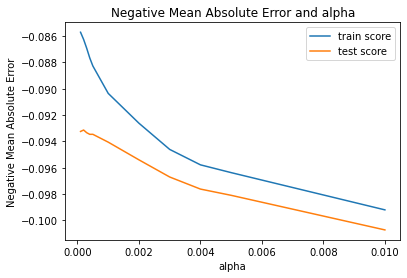

In [250]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [251]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.0002)

In [252]:
# check the coefficient values with lambda = 0.0002

alpha = 0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 0.03770425,  0.11025913,  0.03618027,  0.03531539,  0.0505383 ,
        0.12372886,  0.04593339, -0.03743226,  0.16984293,  0.13315933,
        0.16255674,  0.12137662, -0.08779007,  0.10408121, -0.0319193 ,
       -0.10892631, -0.15637632, -0.04654363, -0.01472551, -0.0275503 ,
        0.08599922, -0.10229546, -0.03698058, -0.03933655, -0.01810027,
        0.10882945,  0.05693044, -0.19232578,  0.08654541, -0.        ,
       -0.        , -0.        ,  0.01162821, -0.        , -0.05311299,
        0.02503427, -0.        ,  0.04631329,  0.00263385, -0.        ,
       -0.        ,  0.03375766, -0.03564991,  0.06148965,  0.12127172,
        0.07467432,  0.06372868, -0.05451775, -0.07145056, -0.04773699])

In [253]:
mean_squared_error(y_test, lasso.predict(X_test))


0.014576285677456715

In [254]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,LotArea,0.0377
1,OverallQual,0.1103
2,OverallCond,0.0362
3,BsmtQual,0.0353
4,BsmtFinSF1,0.0505
5,GrLivArea,0.1237
6,GarageArea,0.0459
7,BuiltOrRemodelAge,-0.0374
8,MSZoning_FV,0.1698
9,MSZoning_RH,0.1332


In [255]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'LotArea': 0.037704247283582196,
 'OverallQual': 0.11025912994557735,
 'OverallCond': 0.03618026706398067,
 'BsmtQual': 0.03531538722921206,
 'BsmtFinSF1': 0.05053829625078875,
 'GrLivArea': 0.1237288625041062,
 'GarageArea': 0.04593339344478237,
 'BuiltOrRemodelAge': -0.03743226436734274,
 'MSZoning_FV': 0.16984292624011652,
 'MSZoning_RH': 0.13315932760323398,
 'MSZoning_RL': 0.16255674470415166,
 'MSZoning_RM': 0.12137662271072697,
 'Neighborhood_BrDale': -0.08779006762836641,
 'Neighborhood_Crawfor': 0.10408120742441611,
 'Neighborhood_Edwards': -0.03191930092650493,
 'Neighborhood_IDOTRR': -0.10892630778090702,
 'Neighborhood_MeadowV': -0.15637632373175478,
 'Neighborhood_Mitchel': -0.04654362855251768,
 'Neighborhood_NAmes': -0.014725506974486156,
 'Neighborhood_NWAmes': -0.02755029604288997,
 'Neighborhood_NridgHt': 0.0859992168130842,
 'Neighborhood_OldTown': -0.10229545828677021,
 'Neighborhood_SWISU': -0.03698058105151408,
 'Neighborhood_Sawyer': -0.03933654717038063,
 'Neig

In [256]:
# check the coefficient values with lambda = 0.0004
#double

alpha = 0.0004

lasso_double = Lasso(alpha=alpha)
        
lasso_double.fit(X_train, y_train) 
lasso_double.coef_
mean_squared_error(y_test, lasso_double.predict(X_test))

0.015020480875919309

In [257]:
lasso_df_double = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso_double.coef_.round(4)})
lasso_df_double = lasso_df_double[lasso_df_double['Coefficient'] != 0.00]
lasso_df_double.reset_index(drop=True, inplace=True)
lasso_df_double

,Features,Coefficient
0,LotArea,0.0375
1,OverallQual,0.1162
2,OverallCond,0.0369
3,BsmtQual,0.0335
4,BsmtFinSF1,0.0509
5,GrLivArea,0.1219
6,GarageArea,0.0460
7,BuiltOrRemodelAge,-0.0384
8,MSZoning_FV,0.0550
9,MSZoning_RL,0.0514


In [258]:
X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
2,MSZoning_FV,True,1,0.169843
4,MSZoning_RL,True,1,0.162557
3,MSZoning_RH,True,1,0.133159
1,GrLivArea,True,1,0.123729
5,MSZoning_RM,True,1,0.121377
12,Foundation_PConc,True,1,0.121272
0,OverallQual,True,1,0.110259
8,Neighborhood_StoneBr,True,1,0.108829
7,Neighborhood_Crawfor,True,1,0.104081
13,Foundation_Stone,True,1,0.063729


Conclusion :
The optimal lambda value in case of Ridge and Lasso is as below:

Ridge - 5
Lasso - 0.0002

The Mean Squared error in case of Ridge and Lasso are:
Ridge - 0.01482
Lasso - 0.01457
The Mean Squared Error of Lasso is slightly lower than that of Ridge

Also, since Lasso helps in feature reduction (as the coefficient value of one of the feature became 0), Lasso is a better over Ridge.

Hence based on Lasso, the factors that generally affect the price are the Zoning classification, Living area square feet, Overall quality and condition of the house, Foundation type of the house, Foundation stone and neighborhood.

Therefore, the variables predicted by Lasso is significant variables for predicting the price of a house.